In [43]:
from zipfile import ZipFile
file_name = 'drive/MyDrive/SDP_Datasets/lung-cancer.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [44]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [45]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [46]:
train_path = 'lung-cancer/Data/train'
valid_path = 'lung-cancer/Data/test'

In [47]:
model_tl = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# IMAGE_SIZE + [3] - RGB images

In [48]:
# Model is already trained, don't train existing weights again
for layer in model_tl.layers:
    layer.trainable = False

In [49]:
# useful for getting number of classes of dataset
folders = glob('lung-cancer/Data/train/*')

In [50]:
len(folders)

4

In [51]:
x = Flatten()(model_tl.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [52]:
# create a model object
model = Model(inputs=model_tl.input, outputs=prediction)

In [53]:
# view the structure of the model
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('lung-cancer/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('lung-cancer/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 864 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [56]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs = 30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
27/27 [==============================] - 12s 413ms/step - loss: 1.8570 - accuracy: 0.4071 - val_loss: 1.0400 - val_accuracy: 0.5000
Epoch 2/30
27/27 [==============================] - 10s 386ms/step - loss: 0.7853 - accuracy: 0.6355 - val_loss: 0.9628 - val_accuracy: 0.5972
Epoch 3/30
27/27 [==============================] - 10s 384ms/step - loss: 0.5530 - accuracy: 0.7731 - val_loss: 0.6337 - val_accuracy: 0.7222
Epoch 4/30
27/27 [==============================] - 10s 384ms/step - loss: 0.4160 - accuracy: 0.8437 - val_loss: 0.5362 - val_accuracy: 0.7778
Epoch 5/30
27/27 [==============================] - 10s 386ms/step - loss: 0.3304 - accuracy: 0.9066 - val_loss: 0.4878 - val_accuracy: 0.8194
Epoch 6/30
27/27 [==============================] - 11s 389ms/step - loss: 0.2635 - accuracy: 0.9285 - val_loss: 0.5692 - val_accuracy: 0.7917
Epoch 7/30
27/27 [==============================] - 10s 384ms/step - loss: 0.2445 - accuracy: 0.9241 - val_loss: 0.4433 - val_accuracy: 0.8333

In [57]:
from keras.models import load_model
model.save('lung-cancer-model.h5')

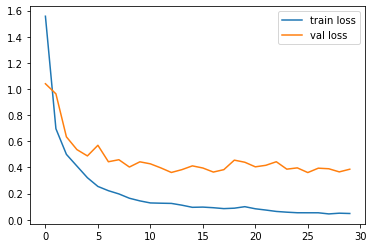

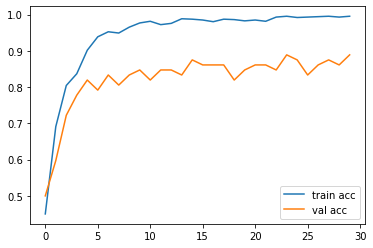

<Figure size 432x288 with 0 Axes>

In [58]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')